In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = np.load('C:/Users/hvasquez/Downloads/proyecto_training_data.npy')
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [3]:
df_proyecto = pd.DataFrame(data, columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd'
                                          ,'AñoDeconstruido','LotFrontage'])
df_proyecto.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,AñoDeconstruido,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
df_proyecto.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,AñoDeconstruido,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [5]:
matriz_correlacion = df_proyecto.corr()
matriz_correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,AñoDeconstruido,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
AñoDeconstruido,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


<AxesSubplot:>

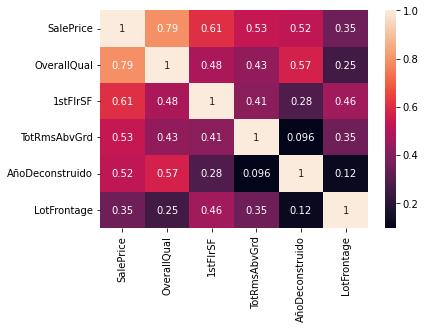

In [6]:
sns.heatmap(matriz_correlacion, annot=True)

Text(0.5, 1.0, 'SalePrice Vs OverallQual - correlacion: 0.79')

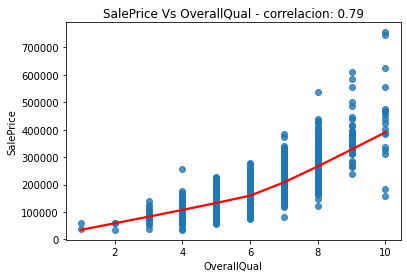

In [7]:
corr_saleprice_overallqual = df_proyecto[['SalePrice','OverallQual']].corr()
y = pd.Series(df_proyecto.SalePrice,name="SalePrice")
sns.regplot(x = df_proyecto.OverallQual, y = y, lowess = True, line_kws={"color": "red"})
plt.title('SalePrice Vs OverallQual - correlacion: {}'.format(round(corr_saleprice_overallqual.OverallQual[0],2)))

In [33]:
x = df_proyecto['OverallQual']
y = df_proyecto['SalePrice']

In [9]:
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(df_proyecto['OverallQual'].values, tf.float32),
            tf.cast(df_proyecto['SalePrice'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'OverallQual:{features_tensor} SalePrice:{target_tensor}')

OverallQual:7.0 SalePrice:208500
OverallQual:6.0 SalePrice:181500
OverallQual:7.0 SalePrice:223500
OverallQual:7.0 SalePrice:140000
OverallQual:8.0 SalePrice:250000
OverallQual:5.0 SalePrice:143000
OverallQual:8.0 SalePrice:307000
OverallQual:7.0 SalePrice:200000
OverallQual:7.0 SalePrice:129900
OverallQual:5.0 SalePrice:118000
OverallQual:5.0 SalePrice:129500
OverallQual:9.0 SalePrice:345000
OverallQual:5.0 SalePrice:144000
OverallQual:7.0 SalePrice:279500
OverallQual:6.0 SalePrice:157000
OverallQual:7.0 SalePrice:132000
OverallQual:6.0 SalePrice:149000
OverallQual:4.0 SalePrice:90000
OverallQual:5.0 SalePrice:159000
OverallQual:5.0 SalePrice:139000
OverallQual:8.0 SalePrice:325300
OverallQual:7.0 SalePrice:139400
OverallQual:8.0 SalePrice:230000
OverallQual:5.0 SalePrice:129900
OverallQual:5.0 SalePrice:154000
OverallQual:8.0 SalePrice:256300
OverallQual:5.0 SalePrice:134800
OverallQual:8.0 SalePrice:306000
OverallQual:5.0 SalePrice:207500
OverallQual:4.0 SalePrice:68500
OverallQual:

OverallQual:7.0 SalePrice:82500
OverallQual:5.0 SalePrice:139400
OverallQual:6.0 SalePrice:144000
OverallQual:6.0 SalePrice:200000
OverallQual:2.0 SalePrice:60000
OverallQual:5.0 SalePrice:93000
OverallQual:5.0 SalePrice:85000
OverallQual:8.0 SalePrice:264561
OverallQual:8.0 SalePrice:274000
OverallQual:7.0 SalePrice:226000
OverallQual:8.0 SalePrice:345000
OverallQual:5.0 SalePrice:152000
OverallQual:9.0 SalePrice:370878
OverallQual:6.0 SalePrice:143250
OverallQual:5.0 SalePrice:98300
OverallQual:6.0 SalePrice:155000
OverallQual:6.0 SalePrice:155000
OverallQual:4.0 SalePrice:84500
OverallQual:7.0 SalePrice:205950
OverallQual:4.0 SalePrice:108000
OverallQual:7.0 SalePrice:191000
OverallQual:6.0 SalePrice:135000
OverallQual:8.0 SalePrice:350000
OverallQual:6.0 SalePrice:88000
OverallQual:5.0 SalePrice:145500
OverallQual:7.0 SalePrice:149000
OverallQual:6.0 SalePrice:97500
OverallQual:5.0 SalePrice:167000
OverallQual:7.0 SalePrice:197900
OverallQual:8.0 SalePrice:402000
OverallQual:6.0 Sa

OverallQual:6.0 SalePrice:162000
OverallQual:6.0 SalePrice:197900
OverallQual:8.0 SalePrice:237000
OverallQual:4.0 SalePrice:68400
OverallQual:7.0 SalePrice:227000
OverallQual:7.0 SalePrice:180000
OverallQual:5.0 SalePrice:150500
OverallQual:6.0 SalePrice:139000
OverallQual:6.0 SalePrice:169000
OverallQual:6.0 SalePrice:132500
OverallQual:6.0 SalePrice:143000
OverallQual:5.0 SalePrice:190000
OverallQual:8.0 SalePrice:278000
OverallQual:8.0 SalePrice:281000
OverallQual:5.0 SalePrice:180500
OverallQual:5.0 SalePrice:119500
OverallQual:5.0 SalePrice:107500
OverallQual:7.0 SalePrice:162900
OverallQual:5.0 SalePrice:115000
OverallQual:5.0 SalePrice:138500
OverallQual:5.0 SalePrice:155000
OverallQual:6.0 SalePrice:140000
OverallQual:10.0 SalePrice:160000
OverallQual:5.0 SalePrice:154000
OverallQual:7.0 SalePrice:225000
OverallQual:6.0 SalePrice:177500
OverallQual:8.0 SalePrice:290000
OverallQual:7.0 SalePrice:232000
OverallQual:7.0 SalePrice:130000
OverallQual:9.0 SalePrice:325000
OverallQua

In [17]:
 print(f'OverallQual:{features_tensor} SalePrice:{target_tensor}')

OverallQual:5.0 SalePrice:147500


In [ ]:
x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

In [23]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.placeholder("float")
Y = tf.placeholder("float")

In [95]:
learning_rate   = 0.01
training_epochs = 4000

In [25]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [27]:
n = len(x) # Number of data points

In [28]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
  
# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
  
# Global Variables Initializer
init = tf.global_variables_initializer()

In [58]:
def costo(y_real,y_aprox):
  """Funcion de costo/perdida/error
    para este caso: mean squared error(MSE)
  """
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox))

In [119]:
# Starting the Tensorflow Session
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Iterating through all the epochs
    for epoch in range(training_epochs):
          
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
          
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            #array = c.eval(session=tf.Session())
            error[epoch] = c
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
      
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 1417362000.0 W = 30047.682 b = 2253.995
Epoch 100 : cost = 1406322600.0 W = 30410.447 b = -67.53198
Epoch 150 : cost = 1395797800.0 W = 30764.6 b = -2334.3188
Epoch 200 : cost = 1385763300.0 W = 31110.37 b = -4547.708
Epoch 250 : cost = 1376196500.0 W = 31447.982 b = -6708.8667
Epoch 300 : cost = 1367075700.0 W = 31777.65 b = -8819.018
Epoch 350 : cost = 1358379400.0 W = 32099.59 b = -10879.494
Epoch 400 : cost = 1350088700.0 W = 32413.934 b = -12891.401
Epoch 450 : cost = 1342184300.0 W = 32720.807 b = -14855.866
Epoch 500 : cost = 1334647700.0 W = 33020.418 b = -16774.102
Epoch 550 : cost = 1327464700.0 W = 33313.133 b = -18646.47
Epoch 600 : cost = 1320612200.0 W = 33598.86 b = -20475.867
Epoch 650 : cost = 1314082400.0 W = 33877.855 b = -22261.156
Epoch 700 : cost = 1307855100.0 W = 34150.324 b = -24004.898
Epoch 750 : cost = 1301918000.0 W = 34416.168 b = -25707.586
Epoch 800 : cost = 1296258400.0 W = 34675.867 b = -27369.785
Epoch 850 : cost = 1290862600.0 W = 3

In [107]:
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 1189263100.0 Weight = 42466.53 bias = -77235.234 



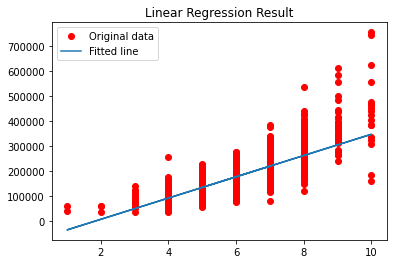

In [108]:
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

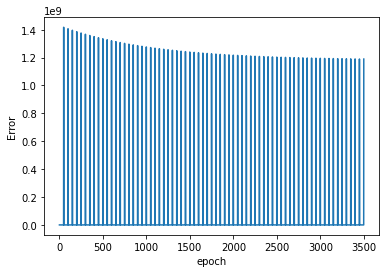

In [120]:
plt.plot(error)
plt.xlabel('epoch')
plt.ylabel('Error')
plt.show()